In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pruning_small_5000 [70.44 69.15 65.69 59.04]
pruning_large_5000 [67.51 62.19 56.5  52.84]
pruning_random_5000 [70.11 67.51 63.27 56.44]


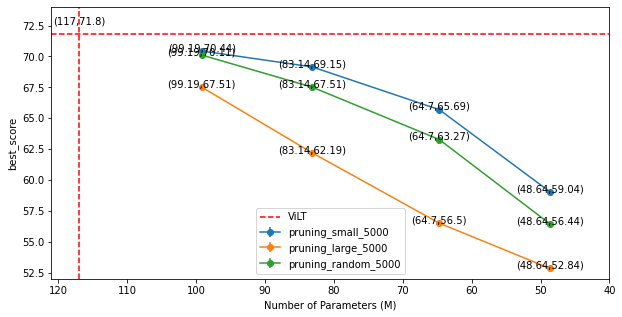

In [20]:
plt.figure(figsize=(10, 5))
for pruning_steps in [5000]:
    output_dir = 'data/experiments/vilt/vqa/pruning_{}_{}_{}/{}'
    n_repeat = 1
    metric = 'best_score'
    for pruning_strategy in ['small', 'large', 'random']:
        params = []
        res = []
        for pruning_ratio in [0.2, 0.4, 0.6, 0.8]:
            for seed in range(n_repeat):
                resolved_output_dir = output_dir.format(pruning_strategy, pruning_ratio, pruning_steps, seed)
                data = json.load(open(resolved_output_dir + '/saved_info.json'))
                params.append(data['params'])
                res.append(data[metric])
        params = np.array(params).reshape((-1, n_repeat))
        res = np.array(res).reshape((-1, n_repeat))
        params = params.mean(1)
        label = 'pruning_{}_{}'.format(pruning_strategy, pruning_steps)
        plt.errorbar(params, res.mean(1), res.std(1), fmt='o-', label = label)
        print(label, res.mean(1))
        for x,y in zip(params,res.mean(1)):
            plt.annotate(f"({x},{y})", (x,y), textcoords="offset points", xytext=(0,0), ha='center')

x, y = 117, 71.8
plt.axhline(y=y, color='r', linestyle="dashed", label='ViLT')
plt.axvline(x=x, color='r', linestyle="dashed")
plt.annotate(f"({x},{y})", (x,y), textcoords="offset points", xytext=(0,10), ha='center')
# plt.plot(45.7,119.8,'b*', label='MiniVLM')
# plt.plot(45.7,120.8,'gD', label='DistillVLM')
# plt.plot(45.7,118.8,'ro', label='R101 + MiniLM')
# plt.plot(45.7,115,'yx', label='Tee + MiniLM')

plt.ylim([52, 74])
plt.xlim([40, 121])
plt.xlabel('Number of Parameters (M)')
plt.ylabel(metric)
plt.gca().invert_xaxis()
plt.legend()
plt.savefig('output/res.png', dpi=300)
plt.show()

In [10]:
resolved_output_dir

'data/experiments/vilt/vqa/pruning_small_0.6_7000/0'